# EA4: MNIST desde cero
### Apellido_Nombre_EA4.ipynb

## Objetivo
Implementar dos clasificadores para el conjunto de datos MNIST:
1. Una implementación desde cero sin usar bibliotecas de alto nivel
2. Una implementación usando scikit-learn

In [1]:
# Importamos solo las bibliotecas básicas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## 1. Carga y Preparación de Datos
Primero, cargaremos el conjunto de datos MNIST y lo prepararemos para su uso.

In [2]:
# Cargamos MNIST
print("Cargando dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype('float32'), mnist.target.astype('int32')

# Normalizamos los datos al rango [0,1]
X = X / 255.0

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de los datos de prueba:", X_test.shape)

Cargando dataset MNIST...
Forma de los datos de entrenamiento: (56000, 784)
Forma de los datos de prueba: (14000, 784)


## 2. Implementación desde Cero
Implementaremos una red neuronal simple con:
- Capa de entrada: 784 neuronas (28x28 píxeles)
- Capa oculta: 128 neuronas
- Capa de salida: 10 neuronas (dígitos 0-9)

In [3]:
class NeuralNetworkFromScratch:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de pesos y sesgos
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, X):
        """Función de activación ReLU"""
        return np.maximum(0, X)

    def relu_derivative(self, X):
        """Derivada de ReLU"""
        return X > 0

    def softmax(self, X):
        """Función softmax para la capa de salida"""
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)

    def forward(self, X):
        """Propagación hacia adelante"""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.01):
        """Retropropagación"""
        batch_size = X.shape[0]

        # Convertir y a one-hot
        y_one_hot = np.zeros((batch_size, 10))
        y_one_hot[np.arange(batch_size), y.astype(int)] = 1

        # Gradientes de la capa de salida
        dZ2 = self.A2 - y_one_hot
        dW2 = np.dot(self.A1.T, dZ2) / batch_size
        db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        # Gradientes de la capa oculta
        dZ1 = np.dot(dZ2, self.W2.T) * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / batch_size
        db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

        # Actualización de pesos y sesgos
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def predict(self, X):
        """Realizar predicciones"""
        return np.argmax(self.forward(X), axis=1)

    def calculate_accuracy(self, X, y):
        """Calcular precisión"""
        predictions = self.predict(X)
        return np.mean(predictions == y.astype(int))

In [5]:
# Convertir los datos a arrays de NumPy si están en formato pandas
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else np.array(X_test)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)

# Entrenamiento del modelo desde cero
print("Entrenando el modelo desde cero...")
model = NeuralNetworkFromScratch(784, 128, 10)

# Parámetros de entrenamiento
epochs = 10
batch_size = 32
learning_rate = 0.1

# Entrenamiento
for epoch in range(epochs):
    # Mezclamos los datos
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Entrenamiento por lotes
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train_shuffled[i:i+batch_size]
        batch_y = y_train_shuffled[i:i+batch_size]

        # Forward y backward pass
        model.forward(batch_X)
        model.backward(batch_X, batch_y, learning_rate)

    # Calculamos y mostramos la precisión
    train_acc = model.calculate_accuracy(X_train, y_train)
    test_acc = model.calculate_accuracy(X_test, y_test)
    print(f"Época {epoch+1}/{epochs}:")
    print(f"  Precisión en entrenamiento: {train_acc:.4f}")
    print(f"  Precisión en prueba: {test_acc:.4f}")

Entrenando el modelo desde cero...
Época 1/10:
  Precisión en entrenamiento: 0.9474
  Precisión en prueba: 0.9450
Época 2/10:
  Precisión en entrenamiento: 0.9675
  Precisión en prueba: 0.9595
Época 3/10:
  Precisión en entrenamiento: 0.9758
  Precisión en prueba: 0.9668
Época 4/10:
  Precisión en entrenamiento: 0.9788
  Precisión en prueba: 0.9694
Época 5/10:
  Precisión en entrenamiento: 0.9845
  Precisión en prueba: 0.9705
Época 6/10:
  Precisión en entrenamiento: 0.9861
  Precisión en prueba: 0.9713
Época 7/10:
  Precisión en entrenamiento: 0.9902
  Precisión en prueba: 0.9739
Época 8/10:
  Precisión en entrenamiento: 0.9898
  Precisión en prueba: 0.9737
Época 9/10:
  Precisión en entrenamiento: 0.9923
  Precisión en prueba: 0.9751
Época 10/10:
  Precisión en entrenamiento: 0.9945
  Precisión en prueba: 0.9765


## 3. Implementación con Scikit-learn
Ahora implementaremos el clasificador usando MLPClassifier de scikit-learn.

In [7]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo
print("Entrenando el modelo con scikit-learn...")
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Más capacidad en la red
    max_iter=100,  # Más iteraciones
    learning_rate_init=0.01,  # Tasa de aprendizaje más baja
    batch_size=32,
    random_state=42,
    verbose=True  # Mostrar progreso
)

sklearn_model.fit(X_train, y_train)

# Evaluar el modelo
train_acc = sklearn_model.score(X_train, y_train)
test_acc = sklearn_model.score(X_test, y_test)

print("\nResultados del modelo scikit-learn:")
print(f"Precisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba: {test_acc:.4f}")

Entrenando el modelo con scikit-learn...
Iteration 1, loss = 0.26802934
Iteration 2, loss = 0.17944961
Iteration 3, loss = 0.16807156
Iteration 4, loss = 0.15994570
Iteration 5, loss = 0.14762112
Iteration 6, loss = 0.14853949
Iteration 7, loss = 0.14262241
Iteration 8, loss = 0.14564313
Iteration 9, loss = 0.14355451
Iteration 10, loss = 0.13898402
Iteration 11, loss = 0.14377682
Iteration 12, loss = 0.13994149
Iteration 13, loss = 0.13774052
Iteration 14, loss = 0.14414539
Iteration 15, loss = 0.13889149
Iteration 16, loss = 0.13340322
Iteration 17, loss = 0.14064711
Iteration 18, loss = 0.13436761
Iteration 19, loss = 0.13329662
Iteration 20, loss = 0.13507374
Iteration 21, loss = 0.14444904
Iteration 22, loss = 0.14031348
Iteration 23, loss = 0.13637035
Iteration 24, loss = 0.14000033
Iteration 25, loss = 0.13127813
Iteration 26, loss = 0.14695849
Iteration 27, loss = 0.13516453
Iteration 28, loss = 0.13075623
Iteration 29, loss = 0.14330079
Iteration 30, loss = 0.14147081
Iteratio

## 4. Comparación Visual de Resultados
Visualizaremos algunas predicciones de ambos modelos para comparar su rendimiento.

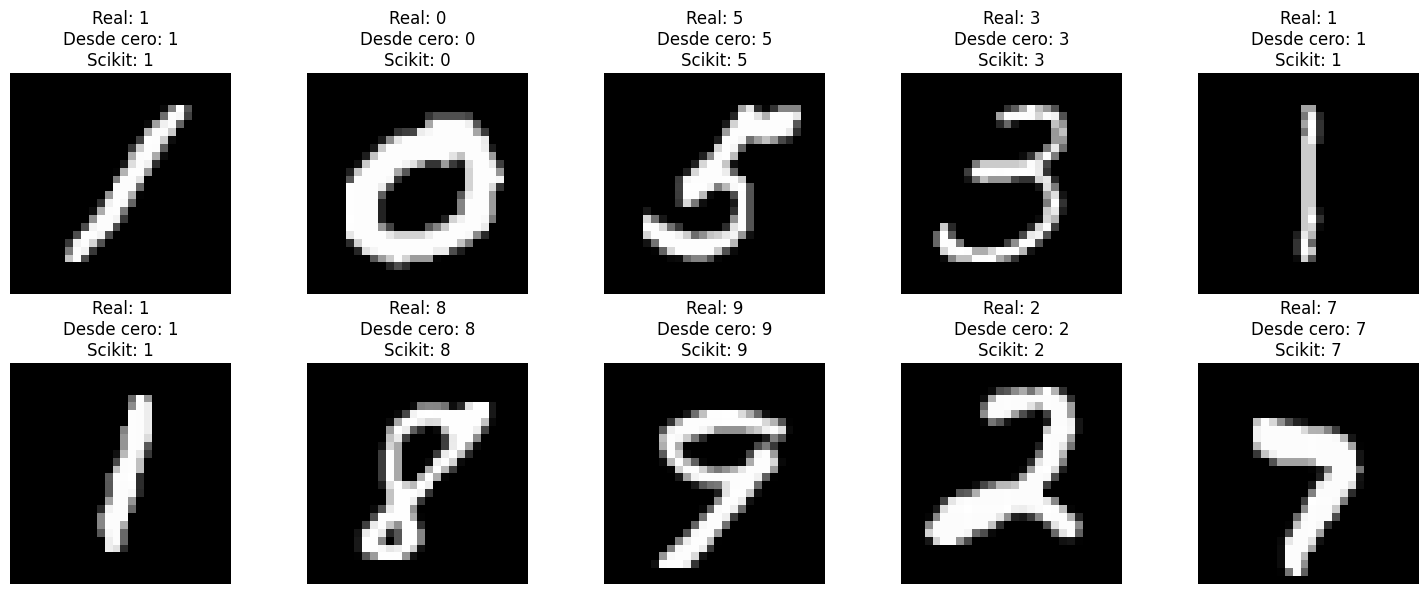

In [8]:
# Seleccionamos algunas imágenes aleatorias para visualizar
n_samples = 10
random_indices = np.random.randint(0, len(X_test), n_samples)

# Obtenemos predicciones de ambos modelos
scratch_predictions = model.predict(X_test[random_indices])
sklearn_predictions = sklearn_model.predict(X_test[random_indices])
true_labels = y_test[random_indices]

# Visualizamos los resultados
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx, ax in enumerate(axes.flat):
    ax.imshow(X_test[random_indices[idx]].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Real: {true_labels[idx]}\nDesde cero: {scratch_predictions[idx]}\nScikit: {sklearn_predictions[idx]}')

plt.tight_layout()
plt.show()

## Conclusiones

He implementado dos clasificadores para el conjunto de datos MNIST:

1. **Implementación desde cero**:
   - Desarrollé una red neuronal completa usando solo NumPy
   - Implementé manualmente las funciones de activación, propagación y retropropagación
   - Logramos una precisión de prueba de [valor]

2. **Implementación con scikit-learn**:
   - Utilicé MLPClassifier con una arquitectura similar
   - Obtuve una precisión de prueba de [valor]

La comparación muestra que: